In [72]:
import seaborn as sns
%matplotlib inline
import os
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt


In [73]:
#loading the xes file
from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply('BPI_Challenge_2013_open_problems.xes')


In [74]:
print(log[0])

{'attributes': {'concept:name': '1-147898401'}, 'events': [{'org:group': 'Org line A2', 'resource country': 'Sweden', 'org:resource': 'Tomas', 'oranization country': 'cn', 'org:role': 'A2_2', 'concept:name': 'Accepted', 'impact': 'Medium', 'product': 'PROD753', 'time:timestamp': datetime.datetime(2006, 11, 7, 10, 0, 36, tzinfo=UTC+01:00), 'lifecycle:transition': 'In Progress'}, '..', {'org:group': 'Org line A2', 'resource country': 'Sweden', 'org:resource': 'Tomas', 'oranization country': 'cn', 'org:role': 'A2_2', 'concept:name': 'Accepted', 'impact': 'Medium', 'product': 'PROD753', 'time:timestamp': datetime.datetime(2011, 9, 3, 7, 9, 9, tzinfo=UTC+02:00), 'lifecycle:transition': 'In Progress'}]}


In [75]:
print(log[0][0])

{'org:group': 'Org line A2', 'resource country': 'Sweden', 'org:resource': 'Tomas', 'oranization country': 'cn', 'org:role': 'A2_2', 'concept:name': 'Accepted', 'impact': 'Medium', 'product': 'PROD753', 'time:timestamp': datetime.datetime(2006, 11, 7, 10, 0, 36, tzinfo=UTC+01:00), 'lifecycle:transition': 'In Progress'}


In [76]:
print(log[0])

{'attributes': {'concept:name': '1-147898401'}, 'events': [{'org:group': 'Org line A2', 'resource country': 'Sweden', 'org:resource': 'Tomas', 'oranization country': 'cn', 'org:role': 'A2_2', 'concept:name': 'Accepted', 'impact': 'Medium', 'product': 'PROD753', 'time:timestamp': datetime.datetime(2006, 11, 7, 10, 0, 36, tzinfo=UTC+01:00), 'lifecycle:transition': 'In Progress'}, '..', {'org:group': 'Org line A2', 'resource country': 'Sweden', 'org:resource': 'Tomas', 'oranization country': 'cn', 'org:role': 'A2_2', 'concept:name': 'Accepted', 'impact': 'Medium', 'product': 'PROD753', 'time:timestamp': datetime.datetime(2011, 9, 3, 7, 9, 9, tzinfo=UTC+02:00), 'lifecycle:transition': 'In Progress'}]}


In [77]:
from pm4py.objects.log.util import sorting

log = sorting.sort_timestamp(log)

In [78]:
#we save the log file into dataframe
from pm4py.objects.conversion.log import converter as xes_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

df = xes_converter.apply(log, variant=xes_converter.Variants.TO_DATA_FRAME)

In [79]:
df.head()

,org:group,resource country,org:resource,oranization country,org:role,concept:name,impact,product,time:timestamp,lifecycle:transition,case:concept:name
0,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2006-11-07 10:00:36+01:00,In Progress,1-147898401
1,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2006-11-07 13:05:44+01:00,In Progress,1-147898401
2,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2009-12-02 14:24:32+01:00,Wait,1-147898401
3,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2011-09-03 07:09:09+02:00,In Progress,1-147898401
4,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2007-03-20 09:06:25+01:00,In Progress,1-165554831


In [80]:
#506 rows are missing in the column org:role 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   org:group             2351 non-null   object
 1   resource country      2351 non-null   object
 2   org:resource          2351 non-null   object
 3   oranization country   2351 non-null   object
 4   org:role              1845 non-null   object
 5   concept:name          2351 non-null   object
 6   impact                2351 non-null   object
 7   product               2351 non-null   object
 8   time:timestamp        2351 non-null   object
 9   lifecycle:transition  2351 non-null   object
 10  case:concept:name     2351 non-null   object
dtypes: object(11)
memory usage: 202.2+ KB


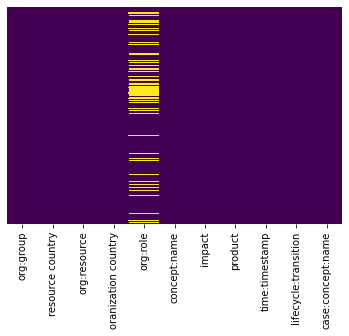

In [81]:
#missing data in the column org:role

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [82]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()



In [83]:
#The types of values that we need to classify in regression for filling the missing values.
df["org:role"].value_counts(1)

E_10    0.179946
A2_1    0.156640
C_6     0.123035
E_4     0.088889
A2_2    0.076965
E_7     0.067751
A2_4    0.044986
E_1     0.043360
E_6     0.042276
A2_3    0.036856
E_8     0.018428
V3_3    0.016260
E_5     0.015718
D_1     0.012466
V3_2    0.010840
E_2     0.010840
D_2     0.008672
C_1     0.008130
A2_5    0.008130
C_3     0.007588
C_2     0.007046
E_3     0.006504
C_5     0.003794
C_4     0.003794
V3_1    0.001084
Name: org:role, dtype: float64

In [84]:
df.head()

,org:group,resource country,org:resource,oranization country,org:role,concept:name,impact,product,time:timestamp,lifecycle:transition,case:concept:name
0,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2006-11-07 10:00:36+01:00,In Progress,1-147898401
1,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2006-11-07 13:05:44+01:00,In Progress,1-147898401
2,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2009-12-02 14:24:32+01:00,Wait,1-147898401
3,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2011-09-03 07:09:09+02:00,In Progress,1-147898401
4,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2007-03-20 09:06:25+01:00,In Progress,1-165554831


In [85]:
#Replacing nan with 0 and shifting it into a different data frame
df['org:role'] = df['org:role'].fillna(0)

df2 = df[df['org:role']==0]

In [86]:
#data frame with no missing values is used as training
df= df[df['org:role'] != 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1845 entries, 0 to 2350
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   org:group             1845 non-null   object
 1   resource country      1845 non-null   object
 2   org:resource          1845 non-null   object
 3   oranization country   1845 non-null   object
 4   org:role              1845 non-null   object
 5   concept:name          1845 non-null   object
 6   impact                1845 non-null   object
 7   product               1845 non-null   object
 8   time:timestamp        1845 non-null   object
 9   lifecycle:transition  1845 non-null   object
 10  case:concept:name     1845 non-null   object
dtypes: object(11)
memory usage: 173.0+ KB


In [87]:
#encoding for dealing with categorical values
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["org_rule_num"] = ord_enc.fit_transform(df[["org:role"]])
df[["org:role", "org_rule_num"]].head(11)

ord_enc = OrdinalEncoder()
df["concept:name_num"] = ord_enc.fit_transform(df[["concept:name"]])
df[["concept:name", "concept:name_num"]].head(11)

ord_enc = OrdinalEncoder()
df["org:group_num"] = ord_enc.fit_transform(df[["org:group"]])
df[["org:group", "org:group_num"]].head(11)

ord_enc = OrdinalEncoder()
df["impact_num"] = ord_enc.fit_transform(df[["impact"]])
df[["impact", "impact_num"]].head(11)

ord_enc = OrdinalEncoder()
df["lifecycle:transition_num"] = ord_enc.fit_transform(df[["lifecycle:transition"]])
df[["lifecycle:transition", "lifecycle:transition_num"]].head(11)

,lifecycle:transition,lifecycle:transition_num
0,In Progress,3.0
1,In Progress,3.0
2,Wait,4.0
3,In Progress,3.0
4,In Progress,3.0
5,Wait,4.0
6,In Progress,3.0
7,In Progress,3.0
8,Wait,4.0
9,In Progress,3.0


In [88]:
df["lifecycle:transition_num"].value_counts()

3.0    900
1.0    354
2.0    241
4.0    185
0.0    165
Name: lifecycle:transition_num, dtype: int64

In [89]:
df['org_rule_num'] = df['org_rule_num'].apply(int)
df['concept:name_num'] = df['concept:name_num'].apply(int)
df['org:group_num'] = df['org:group_num'].apply(int)
df['impact_num'] = df['impact_num'].apply(int)
df['lifecycle:transition_num'] = df['lifecycle:transition_num'].apply(int)



df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1845 entries, 0 to 2350
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   org:group                 1845 non-null   object
 1   resource country          1845 non-null   object
 2   org:resource              1845 non-null   object
 3   oranization country       1845 non-null   object
 4   org:role                  1845 non-null   object
 5   concept:name              1845 non-null   object
 6   impact                    1845 non-null   object
 7   product                   1845 non-null   object
 8   time:timestamp            1845 non-null   object
 9   lifecycle:transition      1845 non-null   object
 10  case:concept:name         1845 non-null   object
 11  org_rule_num              1845 non-null   int64 
 12  concept:name_num          1845 non-null   int64 
 13  org:group_num             1845 non-null   int64 
 14  impact_num              

In [90]:
x = df[['concept:name_num', 'org:group_num',
               'impact_num', 'lifecycle:transition_num',]]
y = df['org_rule_num']

In [91]:
model = LinearRegression().fit(x,y)

In [39]:
#intercept and Coefficient
print('b0 =',model.intercept_)
print('b1 =',model.coef_)

b0 = 1.567206740752633
b1 = [-0.13141141  6.44495607  0.0751897   0.13902139]


In [40]:
y_pred = model.intercept_+ model.coef_*x
print('Predictions:',y_pred ,sep = '\n')

Predictions:
      concept:name_num  org:group_num  impact_num  lifecycle:transition_num
0             1.567207       1.567207    1.792776                  1.984271
1             1.567207       1.567207    1.792776                  1.984271
2             1.567207       1.567207    1.792776                  2.123292
3             1.567207       1.567207    1.792776                  1.984271
4             1.567207       1.567207    1.792776                  1.984271
...                ...            ...         ...                       ...
2346          1.567207      14.457119    1.642396                  2.123292
2347          1.567207       1.567207    1.642396                  1.984271
2348          1.567207       1.567207    1.642396                  1.984271
2349          1.567207       1.567207    1.792776                  1.984271
2350          1.567207       1.567207    1.792776                  1.567207

[1845 rows x 4 columns]


In [41]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x,y)

LinearRegression()

In [42]:
predictions = lm.predict(x)

In [43]:
import numpy as np
round_off_pred = np.round_(predictions)

np.savetxt("y.csv", round_off_pred, delimiter=",")

print(round_off_pred)

[2. 2. 2. ... 2. 2. 2.]


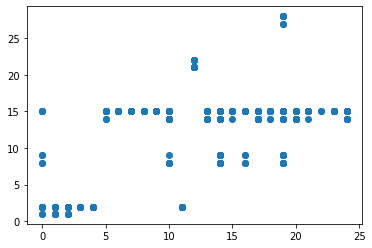

In [44]:
plt.scatter(df["org_rule_num"],round_off_pred)
org = df["org_rule_num"]

In [47]:
# We repeat the same above process for the testing data

ord_enc = OrdinalEncoder()
df2["org_rule_num"] = ord_enc.fit_transform(df2[["org:role"]])
df2[["org:role", "org_rule_num"]].head(11)

df2["concept:name_num"] = ord_enc.fit_transform(df2[["concept:name"]])
df2[["concept:name", "concept:name_num"]].head(11)

df2["org:group_num"] = ord_enc.fit_transform(df2[["org:group"]])
df2[["org:group", "org:group_num"]].head(11)

df2["impact_num"] = ord_enc.fit_transform(df2[["impact"]])
df2[["impact", "impact_num"]].head(11)

df2["lifecycle:transition_num"] = ord_enc.fit_transform(df2[["lifecycle:transition"]])
df2[["lifecycle:transition", "lifecycle:transition_num"]].head(11)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,lifecycle:transition,lifecycle:transition_num
63,In Progress,3.0
64,In Progress,3.0
65,In Progress,3.0
66,In Progress,3.0
75,In Progress,3.0
76,Awaiting Assignment,1.0
81,Awaiting Assignment,1.0
82,In Progress,3.0
83,Closed,2.0
87,In Progress,3.0


In [48]:
df2.head()


,org:group,resource country,org:resource,oranization country,org:role,concept:name,impact,product,time:timestamp,lifecycle:transition,case:concept:name,org_rule_num,concept:name_num,org:group_num,impact_num,lifecycle:transition_num
63,Org line G4,Sweden,Jerker,se,0,Accepted,High,PROD368,2010-04-13 14:37:07+02:00,In Progress,1-366698569,0.0,0.0,3.0,0.0,3.0
64,Org line G4,Sweden,Jerker,se,0,Accepted,High,PROD368,2010-04-19 16:59:00+02:00,In Progress,1-366698569,0.0,0.0,3.0,0.0,3.0
65,Org line G4,Sweden,Jerker,se,0,Accepted,Medium,PROD368,2010-04-13 14:50:15+02:00,In Progress,1-366726662,0.0,0.0,3.0,3.0,3.0
66,Org line G4,Sweden,Jerker,se,0,Accepted,Medium,PROD368,2010-04-19 16:59:58+02:00,In Progress,1-366726662,0.0,0.0,3.0,3.0,3.0
75,Org line G4,Sweden,David,se,0,Accepted,High,PROD551,2010-06-16 16:09:45+02:00,In Progress,1-380632889,0.0,0.0,3.0,0.0,3.0


In [49]:
x_2 = df2[['concept:name_num', 'org:group_num',
               'impact_num', 'lifecycle:transition_num',]]
y_2 = df['org_rule_num']

In [50]:
model = LinearRegression().fit(x,y)
r_square = model.score(x,y)
print('Coefficient of determination:',r_square)

Coefficient of determination: 0.6959685136725706


In [51]:
print('b0 =',model.intercept_)
print('b1 =',model.coef_)

b0 = 1.567206740752633
b1 = [-0.13141141  6.44495607  0.0751897   0.13902139]


In [52]:
predictions_2 = lm.predict(x_2)

In [53]:
import numpy as np
round_off_pred_2 = np.round_(predictions_2)

np.savetxt("test.csv", round_off_pred_2, delimiter=",")

print(round_off_pred)

[2. 2. 2. ... 2. 2. 2.]


In [54]:
#inserting the predictions into the missing dataframe

df2 = df2.assign(predictions=round_off_pred_2)


In [55]:
df["org:role"].value_counts(ascending=True)


V3_1      2
C_4       7
C_5       7
E_3      12
C_2      13
C_3      14
A2_5     15
C_1      15
D_2      16
E_2      20
V3_2     20
D_1      23
E_5      29
V3_3     30
E_8      34
A2_3     68
E_6      78
E_1      80
A2_4     83
E_7     125
A2_2    142
E_4     164
C_6     227
A2_1    289
E_10    332
Name: org:role, dtype: int64

In [56]:
df[["org:role", "org_rule_num"]].value_counts()


org:role  org_rule_num
E_10      14              332
A2_1      0               289
C_6       10              227
E_4       17              164
A2_2      1               142
E_7       20              125
A2_4      3                83
E_1       13               80
E_6       19               78
A2_3      2                68
E_8       21               34
V3_3      24               30
E_5       18               29
D_1       11               23
V3_2      23               20
E_2       15               20
D_2       12               16
C_1       5                15
A2_5      4                15
C_3       7                14
C_2       6                13
E_3       16               12
C_5       9                 7
C_4       8                 7
V3_1      22                2
dtype: int64

In [57]:
map_dict = {14: "E_10", 10: "C_6", 0: "A2_1", 17: "E_4", 1: "A2_2", 20: "E_7 ", 19: "E_6", 13: "E_1", 2: "A2_3", 18: "E_5",
            3: "A2_4", 23: "V3_3", 21: "E_8", 4: "A2_5", 7: "C_3 ", 6: "C_2", 35: "E_10", 41: "E_10", 28: "E_10", 12: "D_2", 5: "C_1", 15: "E_2", 11: "D_1", 
           22: "V3_2", 16: "E_3", 9: "C_5", 8: "C_4", 22:"V3_1", 34: "E_10"}
df2["org_role_n"] = df2["predictions"].map(map_dict)


In [58]:
df2.head()

,org:group,resource country,org:resource,oranization country,org:role,concept:name,impact,product,time:timestamp,lifecycle:transition,case:concept:name,org_rule_num,concept:name_num,org:group_num,impact_num,lifecycle:transition_num,predictions,org_role_n
63,Org line G4,Sweden,Jerker,se,0,Accepted,High,PROD368,2010-04-13 14:37:07+02:00,In Progress,1-366698569,0.0,0.0,3.0,0.0,3.0,21.0,E_8
64,Org line G4,Sweden,Jerker,se,0,Accepted,High,PROD368,2010-04-19 16:59:00+02:00,In Progress,1-366698569,0.0,0.0,3.0,0.0,3.0,21.0,E_8
65,Org line G4,Sweden,Jerker,se,0,Accepted,Medium,PROD368,2010-04-13 14:50:15+02:00,In Progress,1-366726662,0.0,0.0,3.0,3.0,3.0,22.0,V3_1
66,Org line G4,Sweden,Jerker,se,0,Accepted,Medium,PROD368,2010-04-19 16:59:58+02:00,In Progress,1-366726662,0.0,0.0,3.0,3.0,3.0,22.0,V3_1
75,Org line G4,Sweden,David,se,0,Accepted,High,PROD551,2010-06-16 16:09:45+02:00,In Progress,1-380632889,0.0,0.0,3.0,0.0,3.0,21.0,E_8


In [59]:
df2.drop(['org:role', 'org_rule_num', 'concept:name_num', 'org:group_num', 'impact_num', 'lifecycle:transition_num', 'predictions'], axis=1, inplace=True)


In [60]:
df2.columns = df2.columns.str.replace('org_role_n', 'org:role')



df2

,org:group,resource country,org:resource,oranization country,concept:name,impact,product,time:timestamp,lifecycle:transition,case:concept:name,org:role
63,Org line G4,Sweden,Jerker,se,Accepted,High,PROD368,2010-04-13 14:37:07+02:00,In Progress,1-366698569,E_8
64,Org line G4,Sweden,Jerker,se,Accepted,High,PROD368,2010-04-19 16:59:00+02:00,In Progress,1-366698569,E_8
65,Org line G4,Sweden,Jerker,se,Accepted,Medium,PROD368,2010-04-13 14:50:15+02:00,In Progress,1-366726662,V3_1
66,Org line G4,Sweden,Jerker,se,Accepted,Medium,PROD368,2010-04-19 16:59:58+02:00,In Progress,1-366726662,V3_1
75,Org line G4,Sweden,David,se,Accepted,High,PROD551,2010-06-16 16:09:45+02:00,In Progress,1-380632889,E_8
...,...,...,...,...,...,...,...,...,...,...,...
2312,Org line G4,Sweden,Viktoria,se,Queued,Medium,PROD412,2012-06-14 10:06:32+02:00,Awaiting Assignment,1-758488261,E_8
2313,Org line G4,Sweden,Christoffer,se,Accepted,Medium,PROD412,2012-06-14 10:06:45+02:00,In Progress,1-758488261,V3_1
2329,Org line G4,Sweden,Bharath,se,Accepted,Medium,PROD304,2012-06-14 13:43:56+02:00,In Progress,1-758781027,V3_1
2330,Org line G4,Sweden,Bharath,se,Accepted,Medium,PROD304,2012-06-14 13:52:38+02:00,Assigned,1-758781027,E_8


In [61]:
df2 = df2.reindex(columns=['org:group','resource country','org:resource','oranization country', 'org:role', 'concept:name',
                         'impact','product','time:timestamp','lifecycle:transition','case:concept:name'])

In [62]:
df2

,org:group,resource country,org:resource,oranization country,org:role,concept:name,impact,product,time:timestamp,lifecycle:transition,case:concept:name
63,Org line G4,Sweden,Jerker,se,E_8,Accepted,High,PROD368,2010-04-13 14:37:07+02:00,In Progress,1-366698569
64,Org line G4,Sweden,Jerker,se,E_8,Accepted,High,PROD368,2010-04-19 16:59:00+02:00,In Progress,1-366698569
65,Org line G4,Sweden,Jerker,se,V3_1,Accepted,Medium,PROD368,2010-04-13 14:50:15+02:00,In Progress,1-366726662
66,Org line G4,Sweden,Jerker,se,V3_1,Accepted,Medium,PROD368,2010-04-19 16:59:58+02:00,In Progress,1-366726662
75,Org line G4,Sweden,David,se,E_8,Accepted,High,PROD551,2010-06-16 16:09:45+02:00,In Progress,1-380632889
...,...,...,...,...,...,...,...,...,...,...,...
2312,Org line G4,Sweden,Viktoria,se,E_8,Queued,Medium,PROD412,2012-06-14 10:06:32+02:00,Awaiting Assignment,1-758488261
2313,Org line G4,Sweden,Christoffer,se,V3_1,Accepted,Medium,PROD412,2012-06-14 10:06:45+02:00,In Progress,1-758488261
2329,Org line G4,Sweden,Bharath,se,V3_1,Accepted,Medium,PROD304,2012-06-14 13:43:56+02:00,In Progress,1-758781027
2330,Org line G4,Sweden,Bharath,se,E_8,Accepted,Medium,PROD304,2012-06-14 13:52:38+02:00,Assigned,1-758781027


In [63]:
df.drop(['org_rule_num', 'concept:name_num', 'org:group_num', 'impact_num', 'lifecycle:transition_num'], axis=1, inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
result = df.append(df2)

In [65]:
result

,org:group,resource country,org:resource,oranization country,org:role,concept:name,impact,product,time:timestamp,lifecycle:transition,case:concept:name
0,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2006-11-07 10:00:36+01:00,In Progress,1-147898401
1,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2006-11-07 13:05:44+01:00,In Progress,1-147898401
2,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2009-12-02 14:24:32+01:00,Wait,1-147898401
3,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2011-09-03 07:09:09+02:00,In Progress,1-147898401
4,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2007-03-20 09:06:25+01:00,In Progress,1-165554831
...,...,...,...,...,...,...,...,...,...,...,...
2312,Org line G4,Sweden,Viktoria,se,E_8,Queued,Medium,PROD412,2012-06-14 10:06:32+02:00,Awaiting Assignment,1-758488261
2313,Org line G4,Sweden,Christoffer,se,V3_1,Accepted,Medium,PROD412,2012-06-14 10:06:45+02:00,In Progress,1-758488261
2329,Org line G4,Sweden,Bharath,se,V3_1,Accepted,Medium,PROD304,2012-06-14 13:43:56+02:00,In Progress,1-758781027
2330,Org line G4,Sweden,Bharath,se,E_8,Accepted,Medium,PROD304,2012-06-14 13:52:38+02:00,Assigned,1-758781027


In [624]:
#missing data has been replaced
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 2335
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   org:group             2351 non-null   object
 1   resource country      2351 non-null   object
 2   org:resource          2351 non-null   object
 3   oranization country   2351 non-null   object
 4   org:role              2351 non-null   object
 5   concept:name          2351 non-null   object
 6   impact                2351 non-null   object
 7   product               2351 non-null   object
 8   time:timestamp        2351 non-null   object
 9   lifecycle:transition  2351 non-null   object
 10  case:concept:name     2351 non-null   object
dtypes: object(11)
memory usage: 220.4+ KB


In [66]:
#csv file that can be used for disco and other softwares
result.to_csv("results.csv", encoding='utf-8', index=False)


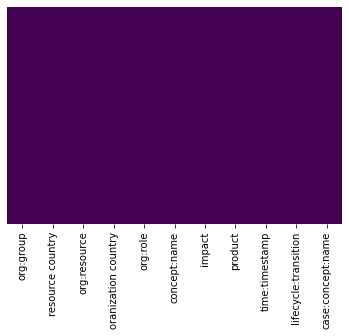

In [67]:
sns.heatmap(result.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [68]:
result

,org:group,resource country,org:resource,oranization country,org:role,concept:name,impact,product,time:timestamp,lifecycle:transition,case:concept:name
0,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2006-11-07 10:00:36+01:00,In Progress,1-147898401
1,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2006-11-07 13:05:44+01:00,In Progress,1-147898401
2,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2009-12-02 14:24:32+01:00,Wait,1-147898401
3,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2011-09-03 07:09:09+02:00,In Progress,1-147898401
4,Org line A2,Sweden,Tomas,cn,A2_2,Accepted,Medium,PROD753,2007-03-20 09:06:25+01:00,In Progress,1-165554831
...,...,...,...,...,...,...,...,...,...,...,...
2312,Org line G4,Sweden,Viktoria,se,E_8,Queued,Medium,PROD412,2012-06-14 10:06:32+02:00,Awaiting Assignment,1-758488261
2313,Org line G4,Sweden,Christoffer,se,V3_1,Accepted,Medium,PROD412,2012-06-14 10:06:45+02:00,In Progress,1-758488261
2329,Org line G4,Sweden,Bharath,se,V3_1,Accepted,Medium,PROD304,2012-06-14 13:43:56+02:00,In Progress,1-758781027
2330,Org line G4,Sweden,Bharath,se,E_8,Accepted,Medium,PROD304,2012-06-14 13:52:38+02:00,Assigned,1-758781027
